# Overview

## Data Manipulation Libraries

In [1]:
import numpy as np
import pandas as pd

## Data Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# code for displaying plots in the same notebook
%matplotlib inline

## Data

In [3]:
# Reading the 'KNN_Project_Data.csv' file into the pandas dataframe
df = pd.read_csv('KNN_Project_Data')

In [4]:
# Brief look of the data
# Displaye top 5 rows of the dataframe
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Exploratory Data Analysis

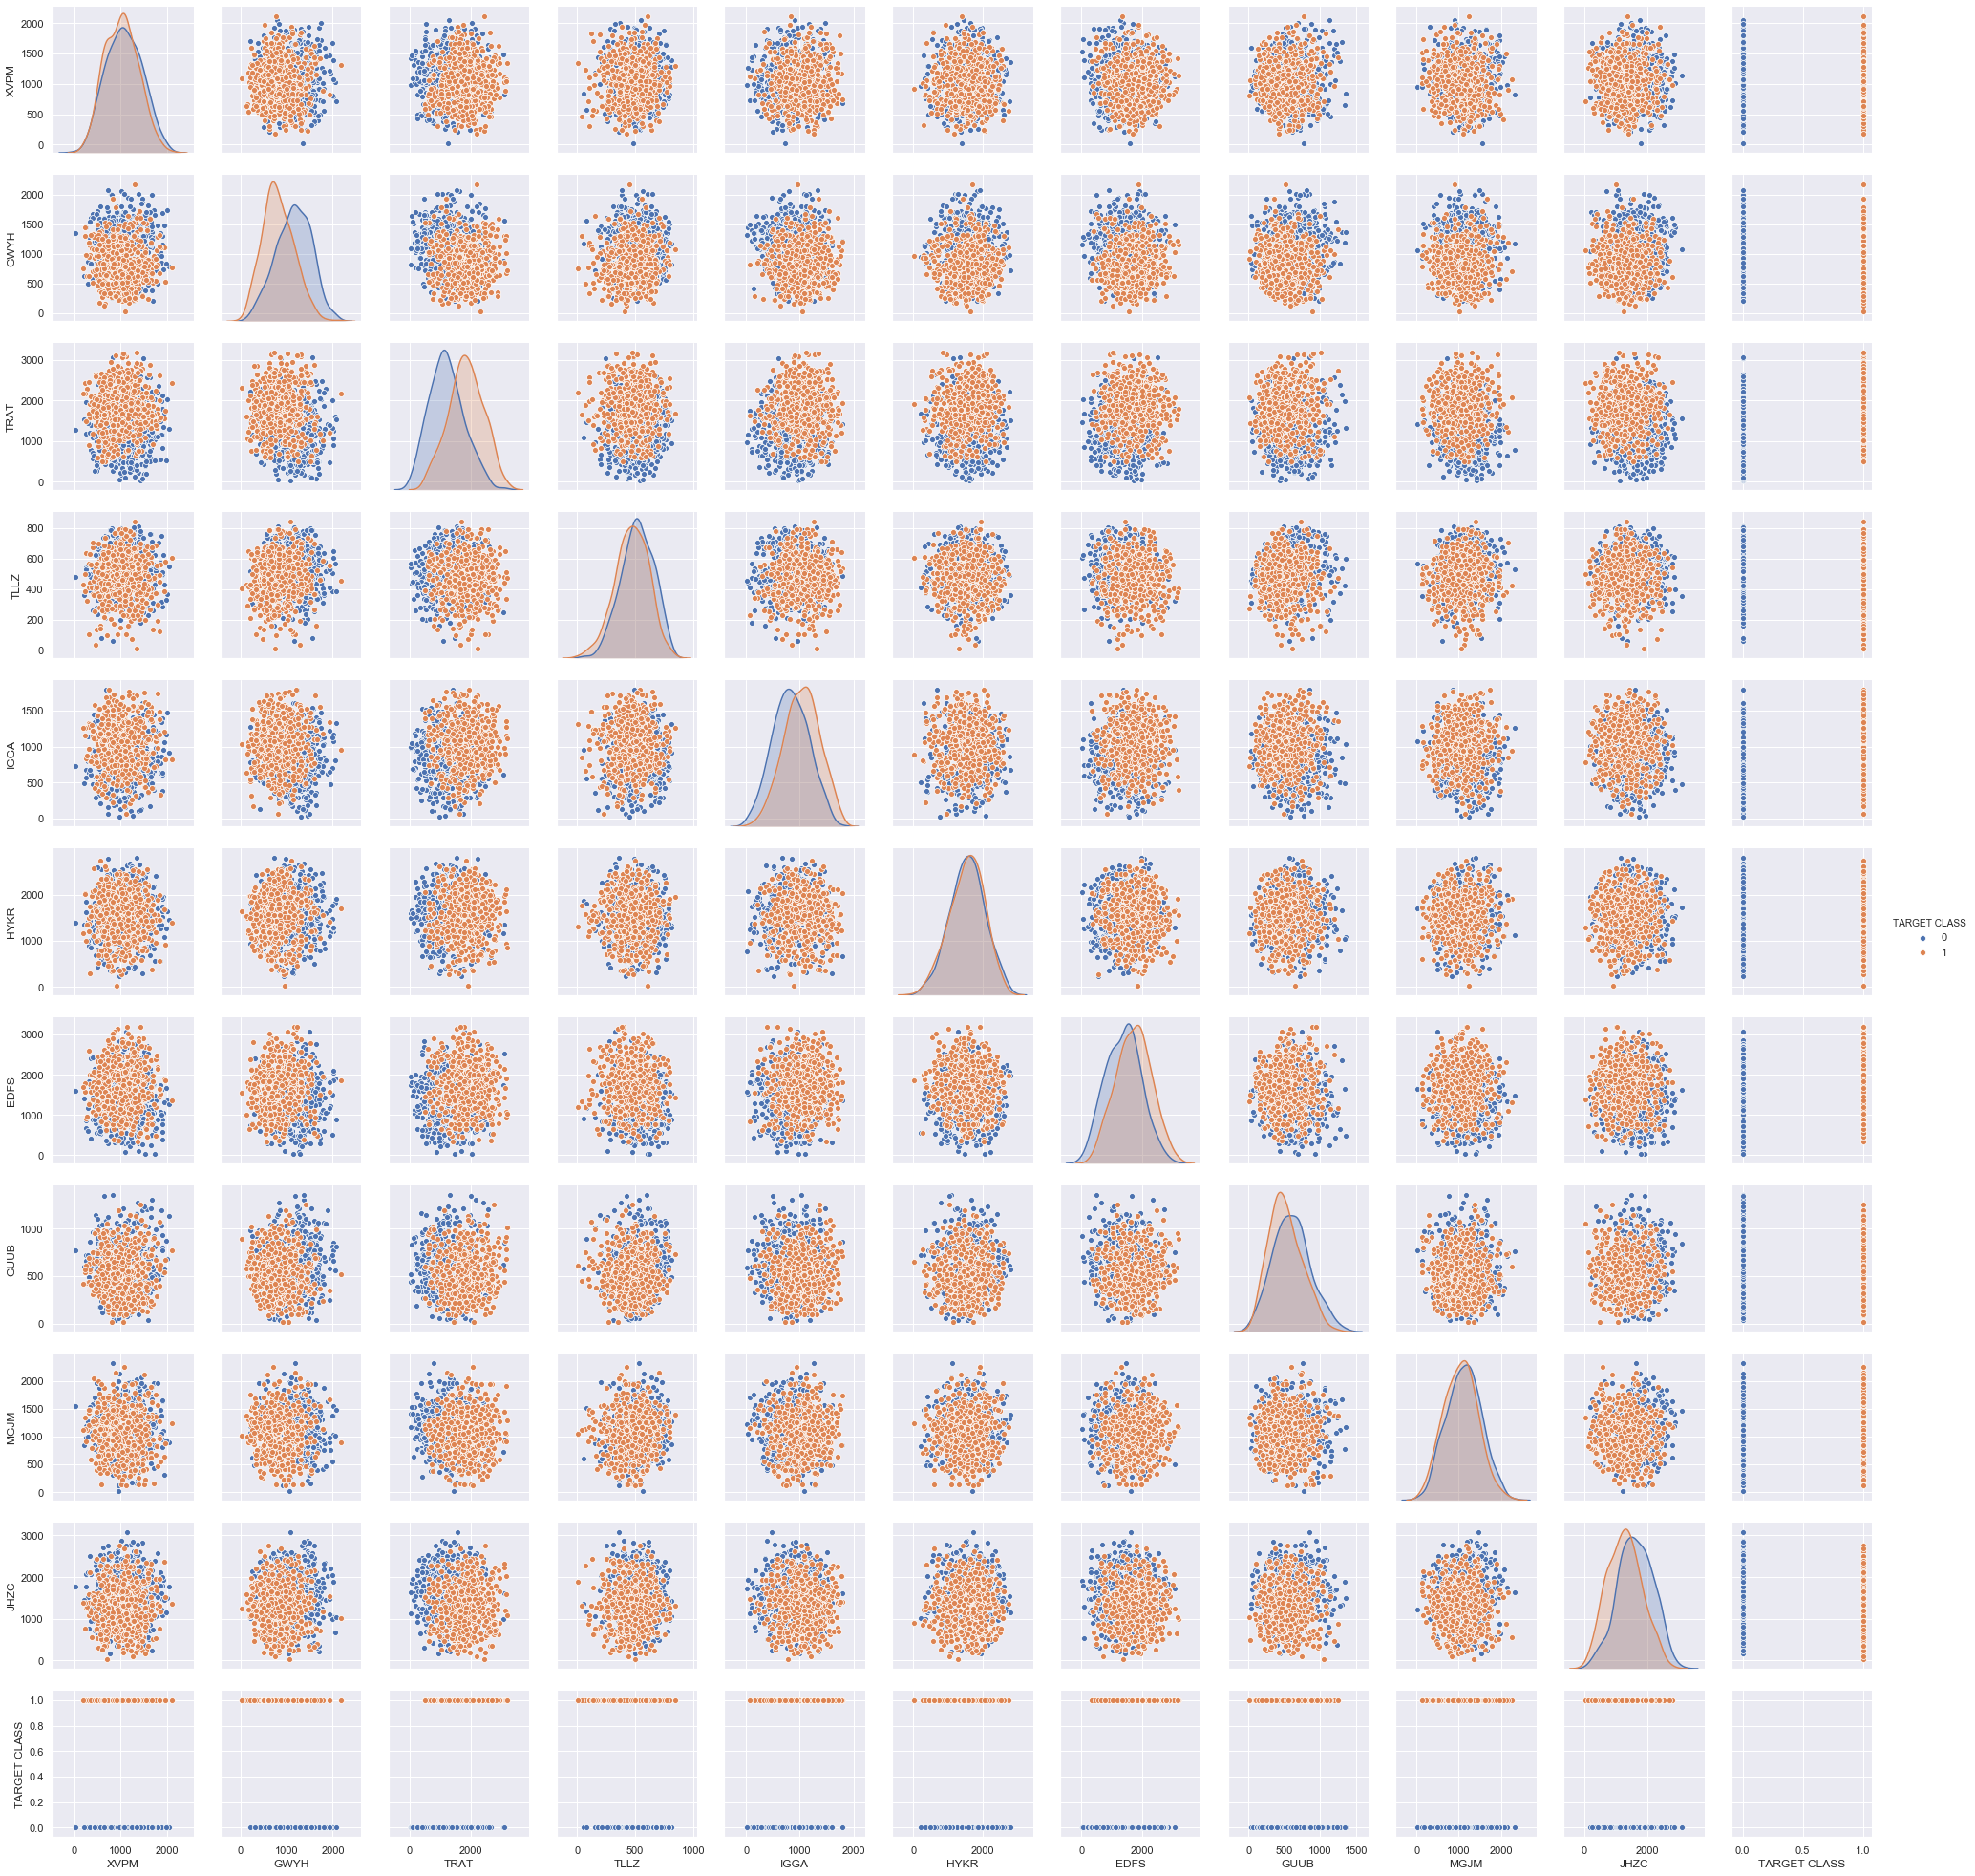

In [6]:
# This is and artificial data and not real data.
# To default the seaborn settings.
sns.set()
# Using only paiplot with seaborn
# for the pairplot data = df and hue = 'TARGET CLASS'
sns.pairplot(data = df, hue = 'TARGET CLASS')

## Data Preprocessing

### Variable Standardization

to standardize the variables why?

In [7]:
# Scikit learn is the main machine learning library
# Importing StandardScaler from Scikit learn's preprocessing module
# why standardscaler
from sklearn.preprocessing import StandardScaler

Creating an instance of StandardScaler object

In [8]:
scaler = StandardScaler()

Fitting the scaler to the variables

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Transforming or Standardizing the varibles using scaler

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

New dataframe with transformed features

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split
By using train_test_split, data will be split into two parts train and test set.

In [12]:
# Importing train_test_split from Scikit learn's model selection module
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size = 0.30, random_state = 101)

## K-Nearest Neighbor Classifier

In [14]:
# Importing KNeighborsClassifier from Scikit learn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

Creating an instance of KNN classifier model with n_neighbors = 1

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)

Fitting the model to the training data

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predict the classification of the variables on test data

In [17]:
predictions = knn.predict(X_test)

## Evaluations
Evaluating predictions from the model

In [18]:
# Importing confusion matrix and classification report from Scikit learn's metrics module
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# Printing confusion matrix
# why confusion matrix
# what is confusion matrix
print(confusion_matrix(y_test, predictions))

[[109  43]
 [ 41 107]]


In [20]:
# Printing classification report
# what is this
# why is this
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## Choosing Appropriate K value 
Using elbow method we will try to pick a good K value.

In [21]:
# Creating a loop to train various KNN models with different k values.
# Also keeping the track of the error for each model in a list
error_rate = []
# for loop
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

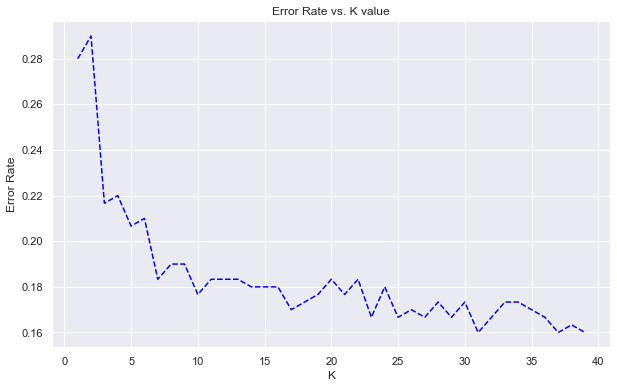

In [22]:
# Plotting the error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## KNN Model with best value

In [25]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

print('\n')
# NOW WITH K=31
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



WITH K=31


[[123  29]
 [ 19 129]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



## Thank You!